# Частотный анализ русского текста и построение облака слов

## Загрузка и отображение данных

In [115]:
#!unzip /content/texts.zip

In [116]:
f = open('/content/texts/The_Master_and_Margarita.txt', "r", encoding='utf-8')
text = f.read()

In [117]:
type(text)

str

In [118]:
len(text)

750512

In [119]:
text[:300]

'Мастер и Маргарита\n\nЧАСТЬ ПЕРВАЯ\n\n…Так кто ж ты, наконец?\n– Я – часть той силы,\nчто вечно хочет\nзла и вечно совершает благо.\n\n\nГете. «Фауст»\n\nГлава 1\nНикогда не разговаривайте с неизвестными\n\nОднажды весною, в час небывало жаркого заката, в Москве, на Патриарших прудах, появились два гражданина. Пер'

## Предварительная обработка текста

In [120]:
# перевод в единый регистр (например, нижний)
text = text.lower()

In [121]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [122]:
type(string.punctuation)

str

In [123]:
spec_chars = string.punctuation + '\n\xa0«»\t—…'

In [124]:
text = text.replace('\xa0\xa0\xa0\xa0',' ')

In [125]:
%%time
text = "".join([ch for ch in text if ch not in spec_chars])

CPU times: user 212 ms, sys: 19.8 ms, total: 232 ms
Wall time: 262 ms


In [126]:
text[:300]

'мастер и маргаритачасть перваятак кто ж ты наконец– я – часть той силычто вечно хочетзла и вечно совершает благогете фаустглава 1никогда не разговаривайте с неизвестнымиоднажды весною в час небывало жаркого заката в москве на патриарших прудах появились два гражданина первый из них одетый в летнюю с'

In [127]:
import re
text = re.sub('\n', '', text)

In [128]:
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

In [129]:
%%time
text = remove_chars_from_text(text, spec_chars)

CPU times: user 196 ms, sys: 10.3 ms, total: 207 ms
Wall time: 239 ms


In [130]:
%%time
text = remove_chars_from_text(text, string.digits)

CPU times: user 142 ms, sys: 18.9 ms, total: 161 ms
Wall time: 175 ms


In [131]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Токенизация текста

In [132]:
from nltk import word_tokenize
text_tokens = word_tokenize(text)

In [133]:
print(type(text_tokens), len(text_tokens))
text_tokens[:100]

<class 'list'> 114057


['мастер',
 'и',
 'маргаритачасть',
 'перваятак',
 'кто',
 'ж',
 'ты',
 'наконец–',
 'я',
 '–',
 'часть',
 'той',
 'силычто',
 'вечно',
 'хочетзла',
 'и',
 'вечно',
 'совершает',
 'благогете',
 'фаустглава',
 'никогда',
 'не',
 'разговаривайте',
 'с',
 'неизвестнымиоднажды',
 'весною',
 'в',
 'час',
 'небывало',
 'жаркого',
 'заката',
 'в',
 'москве',
 'на',
 'патриарших',
 'прудах',
 'появились',
 'два',
 'гражданина',
 'первый',
 'из',
 'них',
 'одетый',
 'в',
 'летнюю',
 'серенькую',
 'пару',
 'был',
 'маленького',
 'роста',
 'упитан',
 'лыс',
 'свою',
 'приличную',
 'шляпу',
 'пирожком',
 'нес',
 'в',
 'руке',
 'а',
 'на',
 'хорошо',
 'выбритом',
 'лице',
 'его',
 'помещались',
 'сверхъестественных',
 'размеров',
 'очки',
 'в',
 'черной',
 'роговой',
 'оправе',
 'второй',
 '–',
 'плечистый',
 'рыжеватый',
 'вихрастый',
 'молодой',
 'человек',
 'в',
 'заломленной',
 'на',
 'затылок',
 'клетчатой',
 'кепке',
 '–',
 'был',
 'в',
 'ковбойке',
 'жеваных',
 'белых',
 'брюках',
 'и',
 'в'

In [134]:
import nltk
text = nltk.Text(text_tokens)
print(type(text))
text[:10]

<class 'nltk.text.Text'>


['мастер',
 'и',
 'маргаритачасть',
 'перваятак',
 'кто',
 'ж',
 'ты',
 'наконец–',
 'я',
 '–']

## Расчёт частоты встречаемости слов

In [135]:
%%time
from nltk.probability import FreqDist
fdist = FreqDist(text)
fdist

CPU times: user 160 ms, sys: 0 ns, total: 160 ms
Wall time: 176 ms


FreqDist({'и': 4926, 'в': 3570, '–': 3200, 'не': 2015, 'на': 1966, 'что': 1735, 'с': 1282, 'он': 1102, 'а': 939, 'я': 850, ...})

In [136]:
fdist.most_common(5)

[('и', 4926), ('в', 3570), ('–', 3200), ('не', 2015), ('на', 1966)]

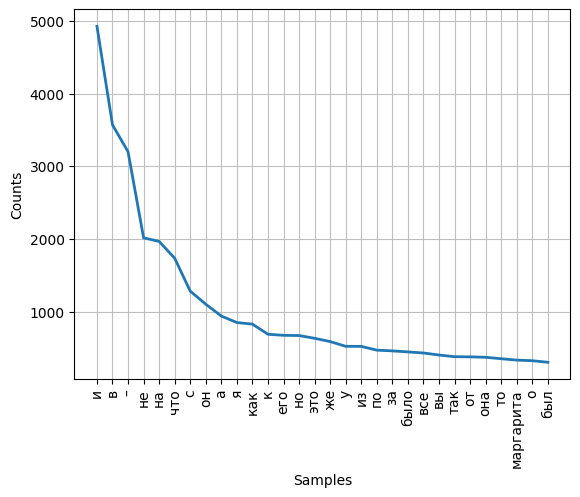

<Axes: xlabel='Samples', ylabel='Counts'>

In [137]:
fdist.plot(30,cumulative=False)

## Удаление стоп-слов

In [138]:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['это', 'нею'])

In [139]:
print(len(russian_stopwords))
russian_stopwords

153


['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [140]:
%%time
text_tokens = [token.strip() for token in text_tokens if token not in russian_stopwords]

CPU times: user 364 ms, sys: 139 µs, total: 364 ms
Wall time: 384 ms


In [141]:
print(len(text_tokens))

72836


In [142]:
text = nltk.Text(text_tokens)

In [143]:
fdist_sw = FreqDist(text)
fdist_sw.most_common(10)

[('–', 3200),
 ('маргарита', 333),
 ('сказал', 232),
 ('ответил', 230),
 ('очень', 186),
 ('иван', 180),
 ('время', 168),
 ('коровьев', 162),
 ('глаза', 161),
 ('человек', 149)]

## Построение облака слов

In [144]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
text_raw = " ".join(text)

In [146]:
wordcloud = WordCloud(background_color='white').generate(text_raw)

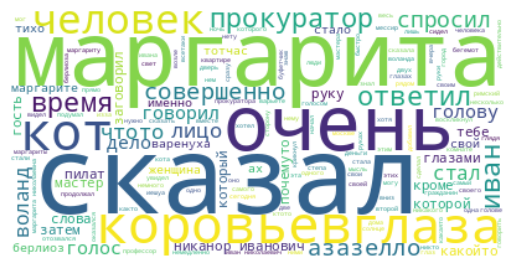

In [147]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Задание 5 баллов
1. выберите любое из произведений Булкагова (файлы доступны
на сайте) и очистите текст (1 балл)
f = open('/content/beg.txt', "r", encoding='Windows-1251')
2. постройте график частоты встречаемости слов (1 балл)
3. постройте график частоты встречамоесть слов в очищенном тексте (1 балл)
4. удалите стоп-слова и выведите самые встречаемые (1 балл)
5. постройте облако слов (1 балл)

In [148]:
f = open('/content/texts/belaya_gvardiya.txt', "r", encoding='Windows-1251')
text = f.read()

In [149]:
len(text)

661668

In [150]:
text[:300]

'Михаил Булгаков \nБелая гвардия\n     \n    Посвящается1 \n    Любови Евгеньевне Белозерской2 \n     \n    Пошел мелкий снег и вдруг повалил хло-\n    пьями. Ветер завыл; сделалась метель. \n    В одно мгновение темное небо смешалось с \n    снежным морем. Все исчезло.\n    - Ну, барин, - закричал ямщик, - бе'

Предварительная очистка текста

In [151]:
text = text.lower()
spec_chars = string.punctuation + '\n\xa0«»\t—…0123456789'
text = text.replace('\xa0\xa0\xa0\xa0', ' ')
text = "".join([ch for ch in text if ch not in spec_chars])
text[:300]

'михаил булгаков белая гвардия         посвящается     любови евгеньевне белозерской          пошел мелкий снег и вдруг повалил хло    пьями ветер завыл сделалась метель     в одно мгновение темное небо смешалось с     снежным морем все исчезло     ну барин  закричал ямщик  беда     буран    капитанс'

Токенизация

In [152]:
text_tokens = word_tokenize(text)

In [153]:
print(type(text_tokens), len(text_tokens))
text_tokens[:100]

<class 'list'> 93589


['михаил',
 'булгаков',
 'белая',
 'гвардия',
 'посвящается',
 'любови',
 'евгеньевне',
 'белозерской',
 'пошел',
 'мелкий',
 'снег',
 'и',
 'вдруг',
 'повалил',
 'хло',
 'пьями',
 'ветер',
 'завыл',
 'сделалась',
 'метель',
 'в',
 'одно',
 'мгновение',
 'темное',
 'небо',
 'смешалось',
 'с',
 'снежным',
 'морем',
 'все',
 'исчезло',
 'ну',
 'барин',
 'закричал',
 'ямщик',
 'беда',
 'буран',
 'капитанская',
 'дочка',
 'и',
 'судимы',
 'были',
 'мертвые',
 'по',
 'написанному',
 'в',
 'книгах',
 'сообразно',
 'с',
 'делами',
 'своими',
 'часть',
 'первая',
 'велик',
 'был',
 'год',
 'и',
 'страшен',
 'год',
 'по',
 'рождестве',
 'христовом',
 'от',
 'начала',
 'же',
 'революции',
 'второй',
 'был',
 'он',
 'обилен',
 'летом',
 'солнцем',
 'а',
 'зимою',
 'снегом',
 'и',
 'особенно',
 'высоко',
 'в',
 'небе',
 'стояли',
 'две',
 'звезды',
 'звезда',
 'пастушеская',
 'вечерняя',
 'венера',
 'и',
 'красный',
 'дрожащий',
 'марс',
 'но',
 'дни',
 'и',
 'в',
 'мирные',
 'и',
 'в',
 'кровавые

In [154]:
text = nltk.Text(text_tokens)
print(type(text))
text[:10]

<class 'nltk.text.Text'>


['михаил',
 'булгаков',
 'белая',
 'гвардия',
 'посвящается',
 'любови',
 'евгеньевне',
 'белозерской',
 'пошел',
 'мелкий']

Частота встречаемости слов в неочищенном тексте

In [155]:
fdist = FreqDist(text)
fdist

FreqDist({'и': 4336, 'в': 3470, 'на': 1638, 'не': 1366, 'с': 1101, 'что': 1089, 'а': 733, 'он': 675, 'как': 593, 'я': 578, ...})

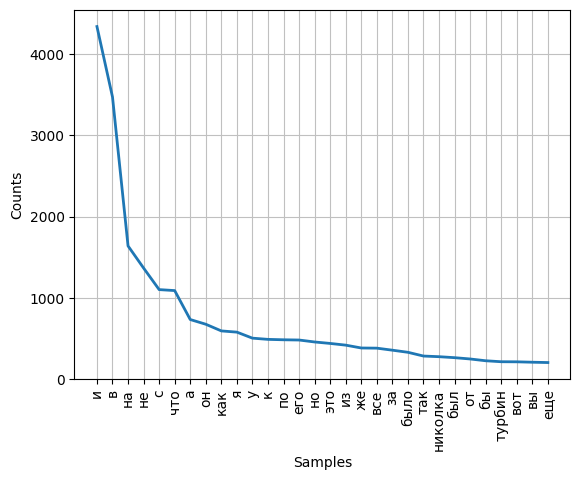

<Axes: xlabel='Samples', ylabel='Counts'>

In [156]:
fdist.plot(30,cumulative=False)

Удаление стоп-слов

In [161]:
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['это', 'нею'])

text_tokens = [token.strip() for token in text_tokens if token not in russian_stopwords]
text = nltk.Text(text_tokens)

Частота встречаемости слов в очищенном тексте

In [162]:
fdist_sw = FreqDist(text)
fdist_sw.most_common(10)

[('николка', 276),
 ('турбин', 214),
 ('сказал', 154),
 ('елена', 152),
 ('глаза', 144),
 ('мышлаевский', 137),
 ('очень', 132),
 ('г', 122),
 ('полковник', 119),
 ('булгаков', 115)]

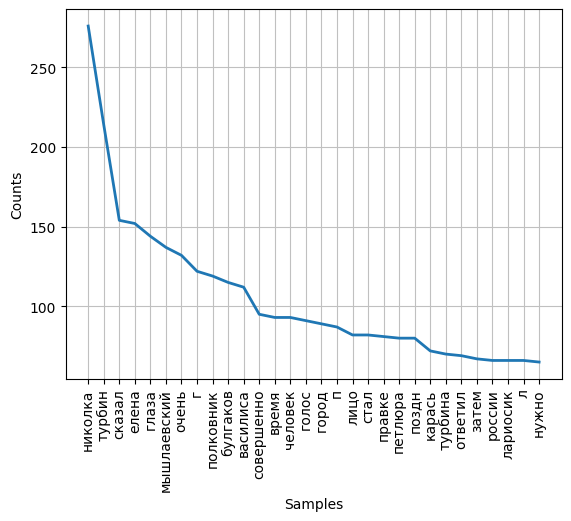

<Axes: xlabel='Samples', ylabel='Counts'>

In [164]:
fdist = FreqDist(text)
fdist.plot(30,cumulative=False)

Построение облака слов

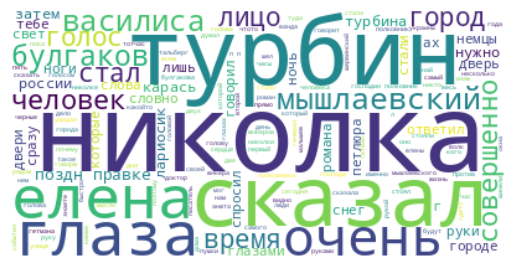

In [165]:
text_raw = " ".join(text)

wordcloud = WordCloud(background_color='white').generate(text_raw)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()